In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge, RidgeCV
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import metrics
import plotly.express as px


In [2]:
data = pd.read_csv('cleaned_data.csv')
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'reservation_status_date',
       'arrival_date_month.April', 'arrival_date_month.August',
       'arrival_date_month.December', 'arrival_date_month.February',
       'arrival_date_month.July', 'arrival_date_month.June',
       'arrival_date_month.March', 'arrival_date_month.May',
       'arrival_date_month.November', 'arrival_date_month.October',
       'arrival_date_month.September', 'Meal.BB', 'Meal.FB', 'Meal.HB',
       'Market.Complementary', 'Market.Corporate', 'Market.Direct',
       'Market.Groups', 'Market.Offline_TA_TO', 'Market.OnlineTA',
       'reserved_room_type.B', 'reserved_room_type.C', 'reserved_room_type.D',
       'res

In [3]:
dropvar = ['assigned_room_type.P', 'reserved_room_type.P','reservation_status_date']
data = data.drop(dropvar, axis = 1)
data

,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,...,assigned_room_type.G,assigned_room_type.H,assigned_room_type.I,assigned_room_type.K,assigned_room_type.L,deposit_type.Non_Refund,deposit_type.Refundable,customer_type.Group,customer_type.Transient,customer_type.Transient_Party
0,1,0,0.464043,0.000000,0.00,0.036364,0.0,0.0,0,0.0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,1.000000,0.000000,0.00,0.036364,0.0,0.0,0,0.0,...,0,0,0,0,0,0,0,0,1,0
2,1,0,0.009498,0.000000,0.02,0.018182,0.0,0.0,0,0.0,...,0,0,0,0,0,0,0,0,1,0
3,1,0,0.017639,0.000000,0.02,0.018182,0.0,0.0,0,0.0,...,0,0,0,0,0,0,0,0,1,0
4,1,0,0.018996,0.000000,0.04,0.036364,0.0,0.0,0,0.0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119200,0,0,0.031208,0.105263,0.10,0.036364,0.0,0.0,0,0.0,...,0,0,0,0,0,0,0,0,1,0
119201,0,0,0.138399,0.105263,0.10,0.054545,0.0,0.0,0,0.0,...,0,0,0,0,0,0,0,0,1,0
119202,0,0,0.046133,0.105263,0.10,0.036364,0.0,0.0,0,0.0,...,0,0,0,0,0,0,0,0,1,0
119203,0,0,0.147897,0.105263,0.10,0.036364,0.0,0.0,0,0.0,...,0,0,0,0,0,0,0,0,1,0


In [5]:
y = data['is_canceled']
xdrop = ['is_canceled']
x = data.drop(xdrop, axis = 1)

In [14]:
alphas = [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1,0.5, 1]

for a in alphas:
    model = Ridge(alpha=a, normalize=True).fit(x,y) 
    score = model.score(x, y)
    pred_y = model.predict(x)
    mse = metrics.mean_squared_error(y, pred_y) 
    print("Alpha:{0:.6f}, R2:{1:.3f}, MSE:{2:.2f}, RMSE:{3:.2f}".format(a, score, mse, np.sqrt(mse)))

Alpha:0.000001, R2:0.357, MSE:0.15, RMSE:0.39
Alpha:0.000010, R2:0.357, MSE:0.15, RMSE:0.39
Alpha:0.000100, R2:0.357, MSE:0.15, RMSE:0.39
Alpha:0.001000, R2:0.357, MSE:0.15, RMSE:0.39
Alpha:0.010000, R2:0.357, MSE:0.15, RMSE:0.39
Alpha:0.100000, R2:0.353, MSE:0.15, RMSE:0.39
Alpha:0.500000, R2:0.324, MSE:0.16, RMSE:0.40
Alpha:1.000000, R2:0.291, MSE:0.17, RMSE:0.41


In [16]:
ridge_cv=RidgeCV(alphas=alphas, store_cv_values=True)
ridge_mod = ridge_cv.fit(x,y)
print(ridge_mod.alpha_)
print(np.mean(ridge_mod.cv_values_, axis=0))

0.5
[0.15009747 0.15009747 0.15009747 0.15009744 0.15009718 0.15009482
 0.15008937 0.15009055]


In [59]:
ridge_coefficient = pd.DataFrame() 
ridge_coefficient["Columns"]= x.columns 
ridge_coefficient['Coefficient_Estimate'] = pd.Series(ridge_mod.coef_)

In [71]:
ridge_coefficient['Coefficient_Estimate'] = ridge_coefficient['Coefficient_Estimate'].abs()
ridge_coefficient = ridge_coefficient.sort_values(by = 'Coefficient_Estimate', ascending=False)

ridge_coefficient

,Columns,Coefficient_Estimate
12,adr,2.897398
13,required_car_parking_spaces,1.951063
4,adults,1.375548
10,booking_changes,0.874119
8,previous_cancellations,0.639990
53,deposit_type.Non_Refund,0.597226
14,total_of_special_requests,0.592029
6,babies,0.515018
52,assigned_room_type.L,0.458027
1,lead_time,0.433230


Text(0.5, 1.0, 'Ridge Coefficient')

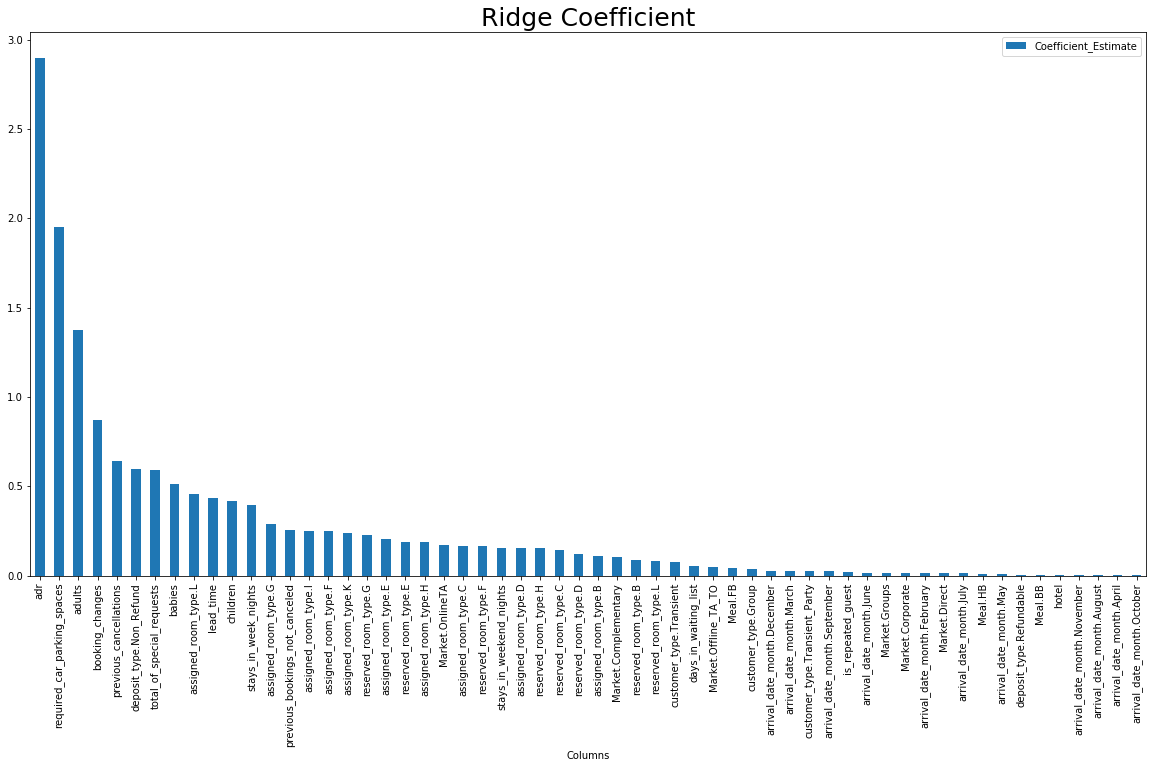

In [68]:
plt.rcParams["figure.figsize"] = (20,10)
ridge_coefficient.plot('Columns', 'Coefficient_Estimate', kind='bar')
plt.title('Ridge Coefficient', fontsize = 25)